## Classification Trees

Classification trees use flowchart-like structures to make decisions. Because humans can readily understand these tree structures, classification trees are useful when transparency is needed, such as in loan approval. We'll use the Lending Club dataset to simulate this scenario.

### Building a simple decision tree
The loans dataset contains 11,312 randomly-selected people who applied for and later received loans from Lending Club, a US-based peer-to-peer lending company.

You will use a decision tree to try to learn patterns in the outcome of these loans (either repaid or default) based on the requested loan amount and credit score at the time of application.

Then, see how the tree's predictions differ for an applicant with good credit versus one with bad credit.

In [1]:
# url = "https://assets.datacamp.com/production/repositories/718/datasets/7805fceacfb205470c0e8800d4ffc37c6944b30c/loans.csv"
# where9am  = read.csv(url)
loans = read.csv("loans.csv")

# check data
head(loans)
str(loans)

# Load the rpart package
library(rpart)

# Build a lending model predicting loan outcome versus loan amount and credit score
loan_model <- rpart(default ~ loan_amount + credit_score, data = loans, method = "class", control = rpart.control(cp = 0))

# predict 
predict(loan_model, loans[8, -c(1, 2, 3)], type = "class")

predict(loan_model, loans[10, -c(1, 2, 3)], type = "class")


keep,rand,default,loan_amount,emp_length,home_ownership,income,loan_purpose,debt_to_income,credit_score,recent_inquiry,delinquent,credit_accounts,bad_public_record,credit_utilization,past_bankrupt
1,0.1304652,0,LOW,10+ years,RENT,LOW,credit_card,HIGH,AVERAGE,YES,NEVER,FEW,NO,HIGH,NO
1,0.9981510,1,LOW,< 2 years,RENT,LOW,car,LOW,AVERAGE,YES,NEVER,FEW,NO,LOW,NO
0,0.6282756,0,LOW,10+ years,RENT,LOW,small_business,AVERAGE,AVERAGE,YES,NEVER,FEW,NO,HIGH,NO
0,0.2524072,0,MEDIUM,10+ years,RENT,MEDIUM,other,HIGH,AVERAGE,YES,MORE THAN 2 YEARS AGO,AVERAGE,NO,LOW,NO
0,0.4744546,0,LOW,< 2 years,RENT,HIGH,other,AVERAGE,AVERAGE,NO,MORE THAN 2 YEARS AGO,MANY,NO,MEDIUM,NO
0,0.7499317,0,LOW,2 - 5 years,RENT,LOW,wedding,AVERAGE,AVERAGE,YES,NEVER,AVERAGE,NO,MEDIUM,NO


'data.frame':	39732 obs. of  16 variables:
 $ keep              : int  1 1 0 0 0 0 0 1 1 1 ...
 $ rand              : num  0.13 0.998 0.628 0.252 0.474 ...
 $ default           : int  0 1 0 0 0 0 0 0 1 1 ...
 $ loan_amount       : Factor w/ 3 levels "HIGH","LOW","MEDIUM": 2 2 2 3 2 2 3 2 3 2 ...
 $ emp_length        : Factor w/ 5 levels "< 2 years","10+ years",..: 2 1 2 2 1 3 4 4 3 1 ...
 $ home_ownership    : Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 4 4 4 4 4 4 4 3 4 ...
 $ income            : Factor w/ 3 levels "HIGH","LOW","MEDIUM": 2 2 2 3 1 2 3 3 3 2 ...
 $ loan_purpose      : Factor w/ 14 levels "car","credit_card",..: 2 1 12 10 10 14 3 1 12 10 ...
 $ debt_to_income    : Factor w/ 3 levels "AVERAGE","HIGH",..: 2 3 1 2 1 1 2 3 3 1 ...
 $ credit_score      : Factor w/ 3 levels "AVERAGE","HIGH",..: 1 1 1 1 1 1 1 3 1 1 ...
 $ recent_inquiry    : Factor w/ 2 levels "NO","YES": 2 2 2 2 1 2 2 2 2 1 ...
 $ delinquent        : Factor w/ 3 levels "IN PAST 2 YEARS",..: 3 3 3 2 2 3 3 3 3 

[1] 0
Levels: 0 1

[1] 0
Levels: 0 1

### Visualizing classification trees
Due to government rules to prevent illegal discrimination, lenders are required to explain why a loan application was rejected.

The structure of classification trees can be depicted visually, which helps to understand how the tree makes its decisions. The model loan_model that you fit in the last exercise is in your workspace.

n= 39732 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 39732 5654 0 (0.8576966 0.1423034) *

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Migue\AppData\Local\Temp\RtmpYXKEVF\downloaded_packages


Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

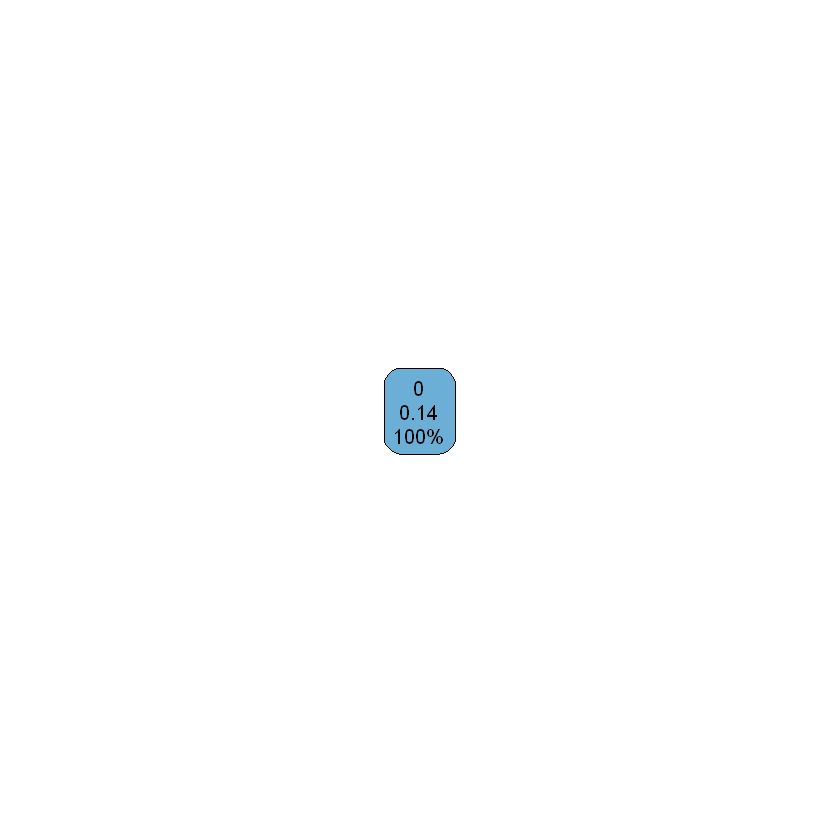

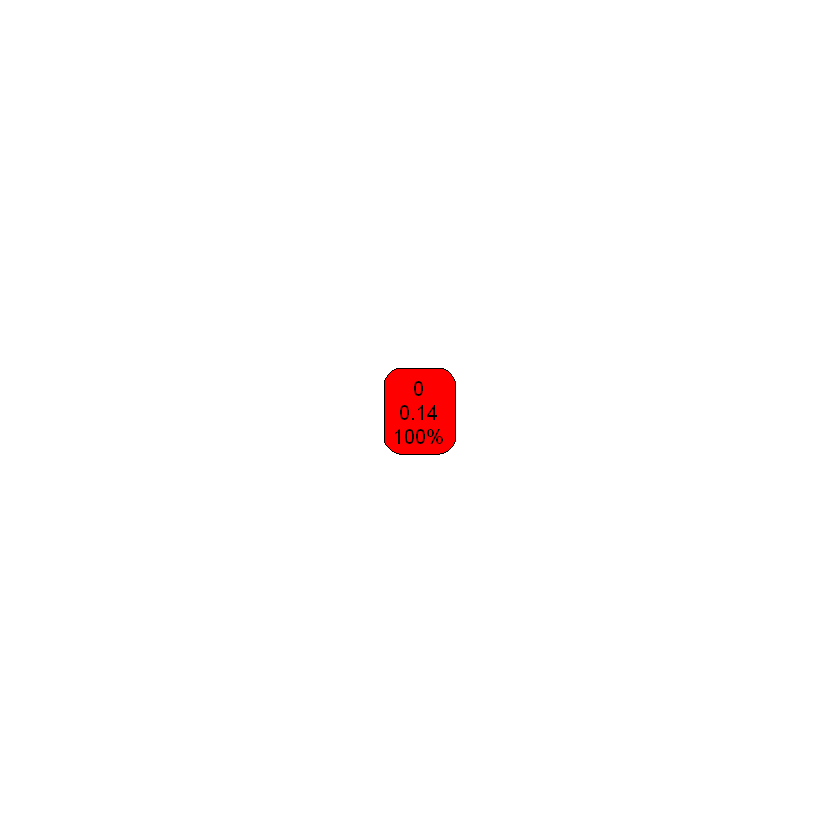

In [2]:
# NOT RUN
# Examine the loan_model object
loan_model

# Load the rpart.plot package
install.packages("rpart.plot")
library(rpart.plot)

# Plot the loan_model with default settings
rpart.plot(loan_model)

# Plot the loan_model with customized settings
rpart.plot(loan_model, type = 3, box.palette = c("red", "green"), fallen.leaves = TRUE)

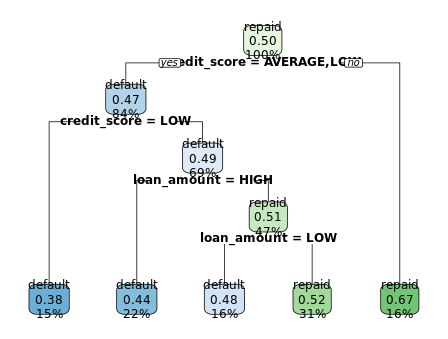

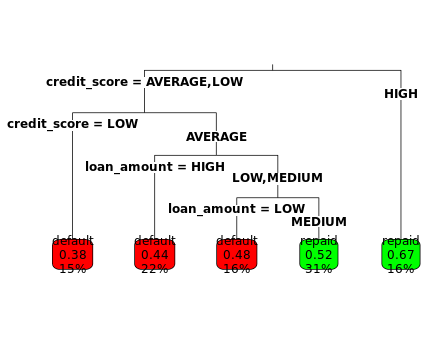

### Creating random test datasets
Before building a more sophisticated lending model, it is important to hold out a portion of the loan data to simulate how well it will predict the outcomes of future loan applicants.

As depicted in the following image, you can use 75% of the observations for training and 25% for testing the model.

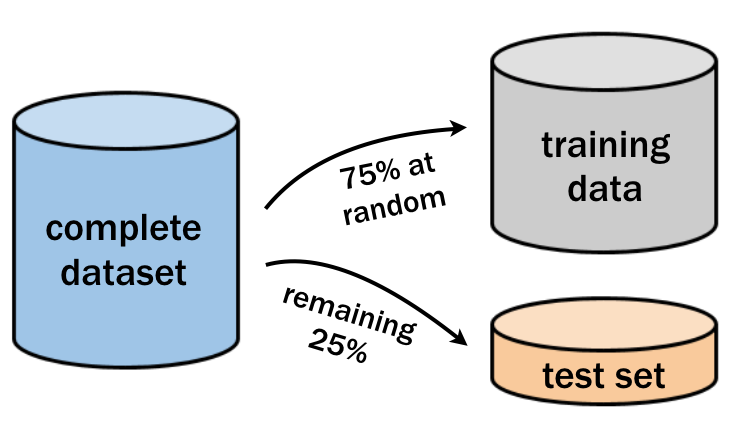

The sample() function can be used to generate a random sample of rows to include in the training set. Simply supply it the total number of observations and the number needed for training.

Use the resulting vector of row IDs to subset the loans into training and testing datasets. 

In [9]:
# Determine the number of rows for training
n = nrow(loans) * .75

# Create a random sample of row IDs
sample_rows <- sample(nrow(loans), n)

# change defualt to a factor variable

loans$default = factor(loans$default)

# Create the training dataset
loans_train <- loans[sample_rows, ]

# Create the test dataset
loans_test <- loans[-sample_rows, ]

### Building and evaluating a larger tree
Previously, you created a simple decision tree that used the applicant's credit score and requested loan amount to predict the loan outcome.

Lending Club has additional information about the applicants, such as home ownership status, length of employment, loan purpose, and past bankruptcies, that may be useful for making more accurate predictions.

Using all of the available applicant data, build a more sophisticated lending model using the random training dataset created previously. Then, use this model to make predictions on the testing dataset to estimate the performance of the model on future loan applications.

In [10]:
# Grow a tree using all of the available applicant data
loan_model <- rpart(default ~., data = loans_train, method = "class", control = rpart.control(cp = 0))

# Make predictions on the test dataset
loans_test$pred <- predict(loan_model, loans_test, type = "class")

# Examine the confusion matrix
table(loans_test$default, loans_test$pred)

# Compute the accuracy on the test dataset
mean(loans_test$default == loans_test$pred)

   
       0    1
  0 8426   94
  1  228 1185

[1] 0.9675828

### Preventing overgrown trees
The tree grown on the full set of applicant data grew to be extremely large and extremely complex, with hundreds of splits and leaf nodes containing only a handful of applicants. This tree would be almost impossible for a loan officer to interpret.

Using the pre-pruning methods for early stopping, you can prevent a tree from growing too large and complex. See how the rpart control options for maximum tree depth and minimum split count impact the resulting tree.

In [11]:
# Grow a tree with maxdepth of 6
loan_model <- rpart(default ~., data = loans_train, method = "class", control = rpart.control(cp = 0, maxdepth = 6))

# Make a class prediction on the test set
loans_test$pred <- predict(loan_model, loans_test, type = "class")

# Compute the accuracy of the simpler tree
mean(loans_test$default == loans_test$pred)

[1] 0.9738246

In [12]:
# Swap maxdepth for a minimum split of 500 
loan_model <- rpart(default ~ ., data = loans_train, method = "class", control = rpart.control(cp = 0, minsplit = 500))

# Run this. How does the accuracy change?
loans_test$pred <- predict(loan_model, loans_test, type = "class")
mean(loans_test$pred == loans_test$default)

[1] 0.9751334

### Creating a nicely pruned tree
Stopping a tree from growing all the way can lead it to ignore some aspects of the data or miss important trends it may have discovered later.

By using post-pruning, you can intentionally grow a large and complex tree then prune it to be smaller and more efficient later on.

In this exercise, you will have the opportunity to construct a visualization of the tree's performance versus complexity, and use this information to prune the tree to an appropriate level.

[1] 0.9751334

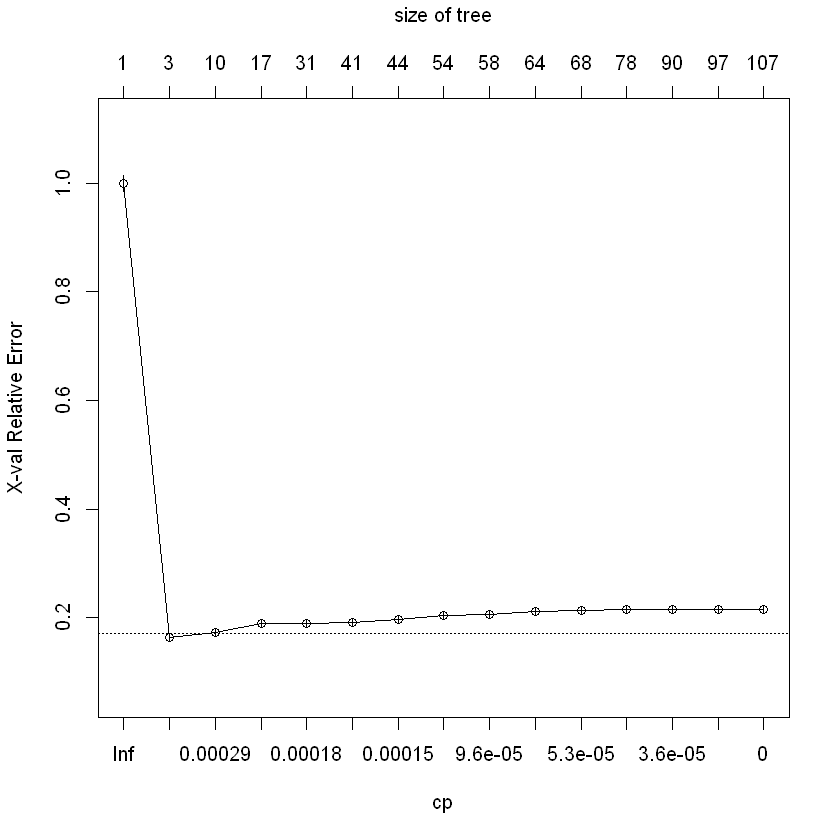

In [13]:
# Grow an overly complex tree
loan_model <- rpart(default ~., data = loans_train, method = "class", control = rpart.control(cp = 0))

# Examine the complexity plot
plotcp(loan_model)

# Based on the complexity plot, prune the tree to a complexity of 0.014

# Prune the tree 
loan_model_pruned <- prune(loan_model, cp = 0.014)

# Compute the accuracy of the pruned tree
loans_test$pred <- predict(loan_model_pruned, loans_test, type = "class")

mean(loans_test$pred == loans_test$default)

### Building a random forest model
In spite of the fact that a forest can contain hundreds of trees, growing a decision tree forest is perhaps even easier than creating a single highly-tuned tree.

Using the randomForest package, build a random forest and see how it compares to the single trees you built previously.

Keep in mind that due to the random nature of the forest, the results may vary slightly each time you create the forest.

In [15]:
# Load the randomForest package
# install.packages("randomForest")
library(randomForest)

# Build a random forest model
loan_model <- randomForest(factor(default) ~., data = loans_train)

# p = 14 # number of dependent variables
# loan_model <- randomForest(factor(default) ~., data = loans_train, ntrees = 500, mtry = sqrt(p))

# Compute the accuracy of the random forest
loans_test$pred <- predict(loan_model, loans_test)
mean(loans_test$pred == loans_test$default)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


[1] 0.9753347